In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import các thư viện  cần thiết**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

In [3]:
target = []
flat_data = []
images = []
imagesdata=[]
DataDirectory = '/content/drive/MyDrive/TranningSVM'



# Images to be classified as:
Categories=['Apple','Jackfruit','Pomegranate','Pomelo','Tomato']

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  # Encode categories cute puppy as 0, icecream cone as 1 and red rose as 2
  target_class = Categories.index(i)
  # Create data path for all folders under MinorProject
  path = os.path.join(DataDirectory,i)
  # Image resizing, to ensure all images are of same dimensions
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # Skimage normalizes the value of image
    img_resized = resize(img_array,(50,50,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    imagesdata.append(img_array)
    target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
imagesdata=np.array(imagesdata)
target = np.array(target)

Category is: Apple 	Label encoded as: 0
Category is: Jackfruit 	Label encoded as: 1
Category is: Pomegranate 	Label encoded as: 2
Category is: Pomelo 	Label encoded as: 3
Category is: Tomato 	Label encoded as: 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [4]:
print(flat_data)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00682353 0.00290196 0.01568627 ... 0.02301961 0.01364706 0.01466667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.17254902 0.17254902 0.17254902 ... 0.17254902 0.17254902 0.17254902]
 [0.00239216 0.         0.01654902 ... 0.         0.         0.        ]]


In [ ]:
df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
# Rows are all the input images (90 images, 30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006510,0.000000,0.000000,0.016706,0.000000,0.000000,0.008231,0.000000,0.000000,0.003922,0.000000,0.000000,0.001020,0.000000,0.000000,0.000958,0.000000,0.000551,0.000000,0.007901,0.000000,0.022667,0.005373,0.002980,0.024471,0.003901,...,0.006902,0.001451,0.003412,0.007922,0.000000,0.014588,0.000000,0.000000,0.005020,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.006824,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.015686,0.000000,0.003216,0.008549,0.000000,0.002745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.000018,0.000018,0.000018,0.000000,0.000000,0.000000,0.001941,0.001941,0.001941,0.000039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.006824,0.002902,0.015686,0.157540,0.207579,0.118452,0.683251,0.838737,0.540424,0.719838,0.901841,0.565253,0.711285,0.879991,0.600963,0.522383,0.686030,0.471991,0.556703,0.793351,0.416253,0.622267,0.847886,0.442306,0.812874,0.892084,0.757546,0.976901,0.968823,0.957293,0.983954,0.977922,0.977968,0.979804,0.983660,0.967307,0.992157,0.990196,0.989529,0.996065,...,0.533333,0.411765,0.209471,0.580157,0.427294,0.243647,0.613875,0.446228,0.263718,0.635530,0.446864,0.301100,0.643137,0.457916,0.331059,0.651255,0.486875,0.356745,0.633647,0.426078,0.356039,0.637867,0.389907,0.346887,0.618793,0.371067,0.303067,0.591100,0.395373,0.290983,0.609843,0.373918,0.283020,0.401765,0.254256,0.204039,0.023020,0.013647,0.014667,0
3,0.569804,0.741333,0.546009,0.568649,0.700011,0.534285,0.513882,0.677725,0.518667,0.529464,0.642380,0.518144,0.569189,0.527719,0.466667,0.591387,0.378524,0.390980,0.519216,0.339686,0.353573,0.555608,0.399788,0.377725,0.681526,0.703879,0.551922,0.595843,0.728157,0.587451,0.592626,0.713725,0.594275,0.576392,0.716706,0.594902,0.563686,0.728392,0.559255,0.565705,...,0.968706,0.947137,0.914745,0.921528,0.922254,0.892784,0.521413,0.605807,0.584082,0.449787,0.547826,0.533333,0.456784,0.554824,0.540157,0.450878,0.544471,0.529804,0.459926,0.538745,0.521569,0.466667,0.556314,0.533333,0.461412,0.566039,0.541176,0.458118,0.575765,0.543373,0.475529,0.584157,0.567616,0.471675,0.554891,0.548706,0.427451,0.500941,0.474510,0
4,0.000000,0.000000,0.010745,0.066627,0.056667,0.027843,0.322757,0.308890,0.117608,0.375765,0.352235,0.116941,0.347765,0.324235,0.092316,0.331245,0.303794,0.084510,0.326157,0.298706,0.088376,0.276592,0.258824,0.066898,0.310392,0.301874,0.109717,0.329843,0.331686,0.137783,0.293838,0.301681,0.117681,0.250824,0.256321,0.109725,0.241275,0.234941,0.104824,0.255882,...,0.380745,0.337608,0.451686,0.398360,0.380941,0.506353,0.418392,0.416078,0.542818,0.433590,0.431940,0.559080,0.444109,0.442205,0.568667,0.467722,0.467490,0.595294,0.496487,0.496487,0.640588,0.513882,0.513882,0.662902,0.546157,0.546157,0.695176,0.552329,0.557569,0.698745,0.537478,0.536302,0.697086,0.336118,0.333450,0.441647,0.008118,0.012457,0.019451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

**Hiển thị hình ảnh ban đầu**

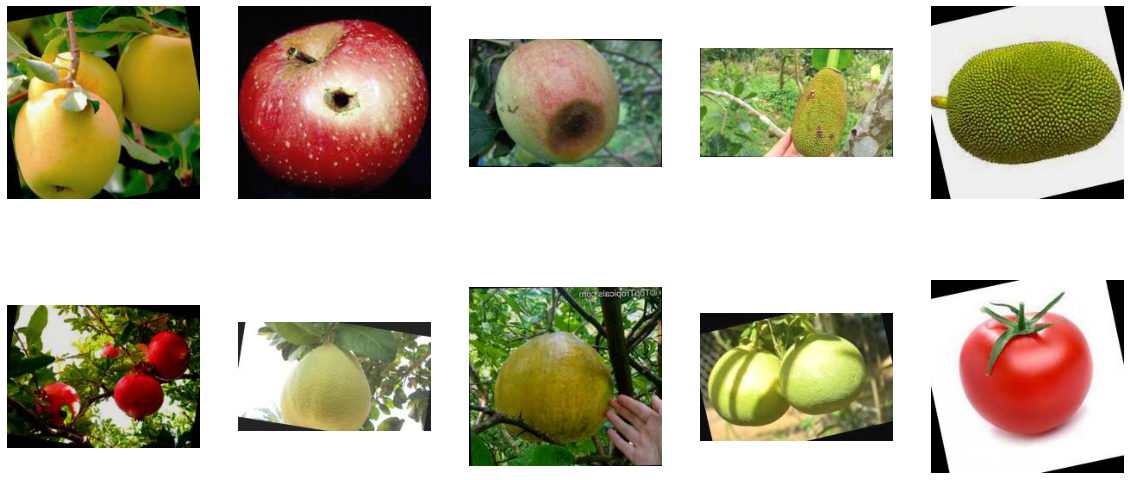

In [ ]:
plt.figure(figsize=(20,100))
for i in range(10):
  plt.subplot(20,5,i+1)
  plt.imshow(imagesdata[i*1300])
  plt.axis('off')
plt.show()

**Hiển thị hình ảnh sau khi xử lý**

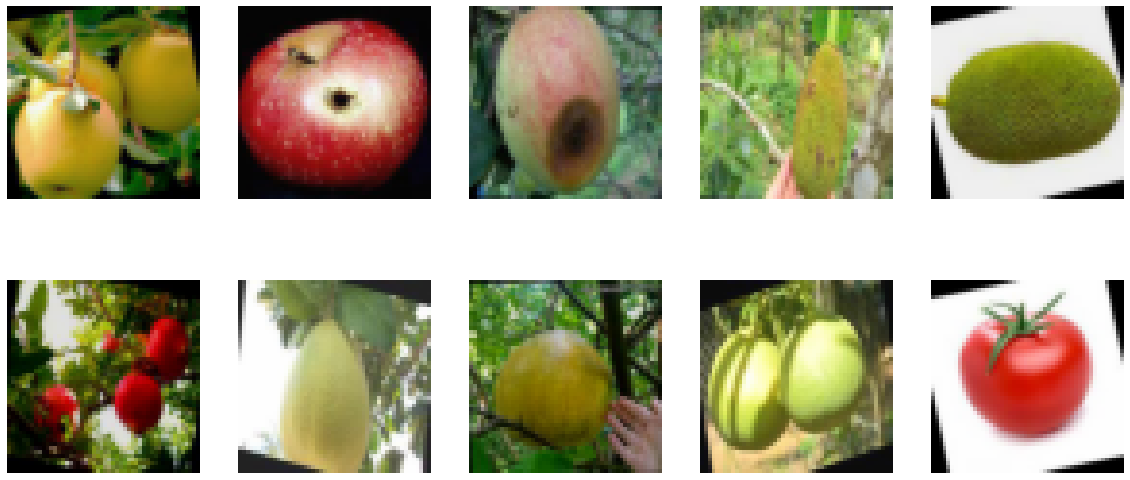

In [ ]:
plt.figure(figsize=(20,100))
for i in range(10):
  plt.subplot(20,5,i+1)
  plt.imshow(images[i*1300])
  plt.axis('off')
plt.show()


**Chia tập dữ liệu traning với testingtesting**

In [ ]:
# Split data into input and output sets
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.1,random_state=120,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (13058, 7500)
Output data dimensions: (13058,)
Dimensions of input training data: (11752, 7500)
Dimensions of input testing data: (1306, 7500)
Dimensions of output training data: (11752,)
Dimensions of output testing data: (1306,)


**Hiển thị số dữ liệu traning tương ứng với từng class**

In [ ]:
# Check if testing and training data are divided in equal proportions
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1, 2, 3, 4]), array([2453, 2339, 2117, 2485, 2358]))
(array([0, 1, 2, 3, 4]), array([273, 260, 235, 276, 262]))


# Training 

In [ ]:
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
tuned_parameters = [{'C': [10], 'gamma': [0.001], 'kernel':[ 'rbf']}]
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3) 
cv.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.929 total time= 7.9min
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.934 total time= 7.7min
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.939 total time= 7.9min
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.927 total time= 7.8min
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.930 total time= 7.9min


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [10], 'gamma': [0.001], 'kernel': ['rbf']}],
             verbose=3)

In [ ]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
# Display model after hyperparameter tuning
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=10, gamma=0.001)


# Đánh giá mô hình

In [ ]:
y_prediction = svm.predict(x_test)

In [ ]:
# Print expected and predicted output
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Expected results:  [3 0 0 ... 4 0 1]
Predicted results: [3 0 0 ... 4 0 1]


In [ ]:
# Evaluate the model using confusion matrix, classification report and accuracy

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[256   1   5   1   4]
 [  3 256   2   5   4]
 [  6   0 225   0   4]
 [  3   3   0 268   5]
 [  5   0   3   2 245]]

Classification report of model:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       267
           1       0.98      0.95      0.97       270
           2       0.96      0.96      0.96       235
           3       0.97      0.96      0.97       279
           4       0.94      0.96      0.95       255

    accuracy                           0.96      1306
   macro avg       0.96      0.96      0.96      1306
weighted avg       0.96      0.96      0.96      1306

Accuracy score: 95.71209800918837


In [ ]:
import pickle
# Save SVM model in pickle file
pickle.dump(svm,open("SVM_Class.p","wb"))

In [ ]:
# Read byte from pickle model
test_model = pickle.load(open("SVM_Class.p","rb"))

# Thử test với 1 hình ảnh

Dimensions of original image are: (225, 225, 3)
PREDICTED OUTPUT IS: Pomelo


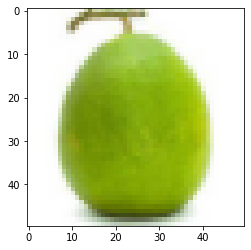

In [ ]:
# Testing for a new image
flat_data = []
# url = input ('C:/Users/LENOVO/Downloads/062-2.jpg')
img_array = imread('/content/sample_data/QUA BUOI.jpg')
# Resize image
img_resized = resize(img_array,(50,50,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
# URLs to test:
#https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg
#https://upload.wikimedia.org/wikipedia/commons/7/71/St._Bernard_puppy.jpg
print("PREDICTED OUTPUT IS:",y_output)